In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../data/FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


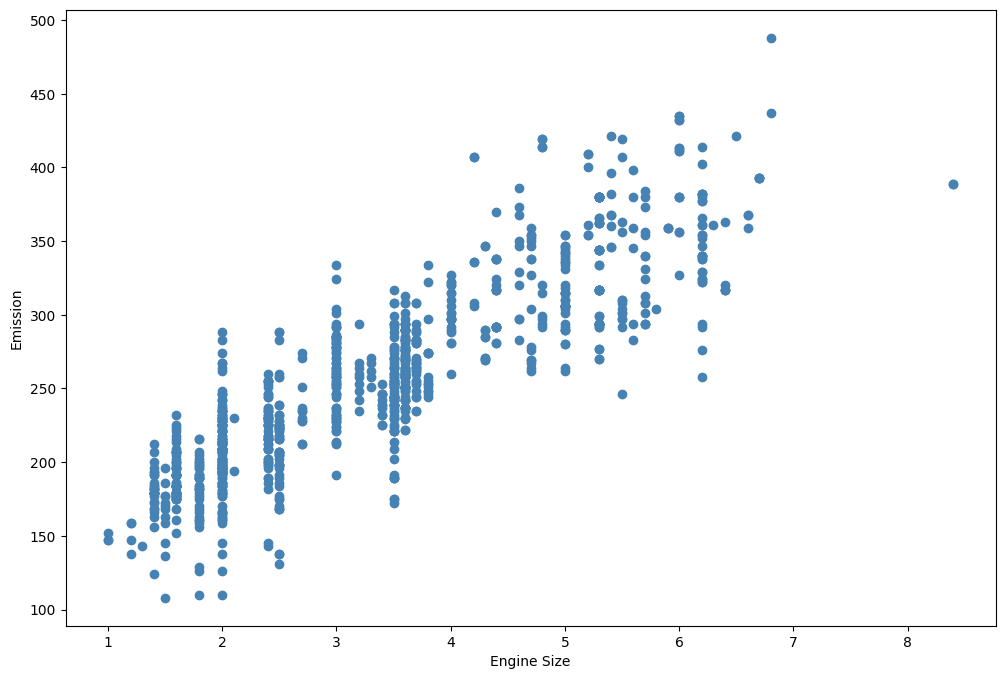

In [3]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='steelblue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [4]:
# Creating train and test dataset
# msk = np.random.rand(len(df)) < 0.8 yerine model_selection.train_test_split kullanılabilir

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.

2nd degree:
y = b + θ1 x + θ2 x^2

b = θ0

For example, the original feature set has only one feature: ENGINSIZE

If we select the segree of the polynomial to be 2:

It generates 3 features: degree=0, degree=1, degree=2

1, x and x^2

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# train_x = np.asanyarray(train[['ENGINESIZE']])
# train_y = np.asanyarray(train[['CO2EMISSIONS']])
# test_x = np.asanyarray(test[['ENGINESIZE']])
# test_y = np.asanyarray(test[['CO2EMISSIONS']])

train_x = train[['ENGINESIZE']].values
train_y = train[['CO2EMISSIONS']].values

test_x = test[['ENGINESIZE']].values
test_y = test[['CO2EMISSIONS']].values

poly = PolynomialFeatures(degree=2)

In [6]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    5.   25.  ]
 [ 1.    3.3  10.89]
 [ 1.    3.5  12.25]
 ...
 [ 1.    2.5   6.25]
 [ 1.    5.7  32.49]
 [ 1.    3.6  12.96]]


- Transformed data looks like features sets of multiple linear regression analysis.

2nd degree quation would be turn into:
y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.

In [7]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [8]:
train_y = clf.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         52.58948381 -1.74732872]]
Intercept:  [103.29847897]


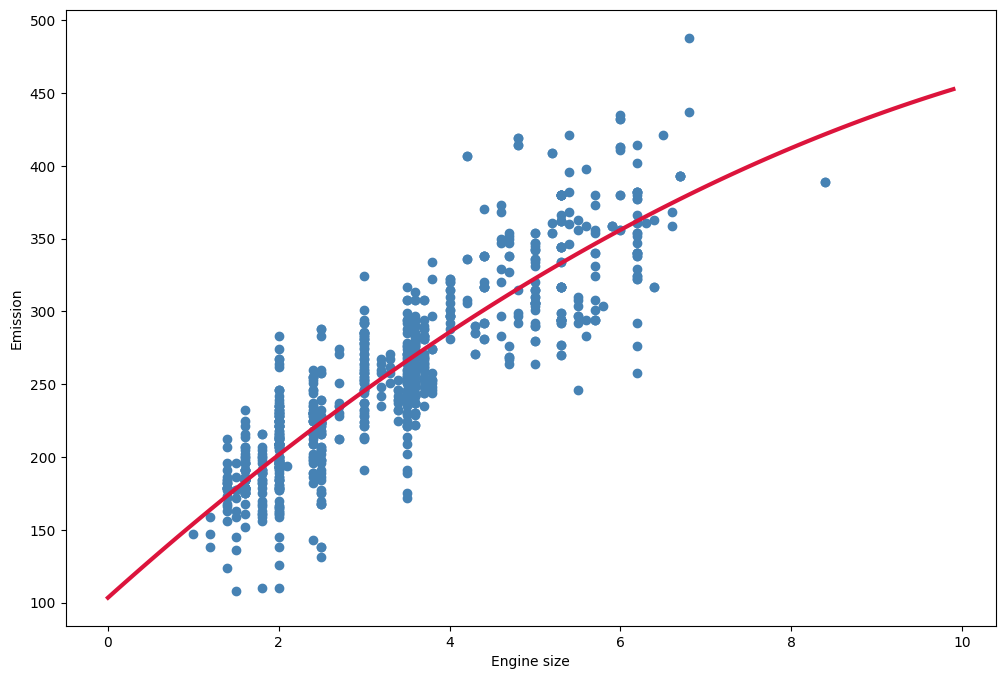

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='steelblue')
XX = np.arange(0.0, 10.0, 0.1) # line eğimi belirlenerek kör bir şekilde çizgi çizilir
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'crimson', linewidth=3)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[103.29847897 108.53995406 113.74648258 118.91806452 124.05469989
 129.15638869 134.22313091 139.25492656 144.25177563 149.21367813
 154.14063405 159.0326434  163.88970618 168.71182238 173.49899201
 178.25121506 182.96849154 187.65082144 192.29820477 196.91064152
 201.4881317  206.03067531 210.53827234 215.0109228  219.44862668
 223.85138399 228.21919472 232.55205888 236.84997647 241.11294748
 245.34097191 249.53404978 253.69218106 257.81536578 261.90360391
 265.95689548 269.97524047 273.95863889 277.90709073 281.82059599
 285.69915469 289.5427668  293.35143235 297.12515132 300.86392371

# Evaluation
- Mean Absolute Error (MAE)
- 

In [11]:
# Evaluation
# Mean Absolute Error (MAE) 

from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
# print(train_x_poly)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
print("RMSE: %.2f" % np.sqrt(np.mean((test_y_ - test_y) ** 2)))

Mean absolute error: 22.89
Residual sum of squares (MSE): 915.19
R2-score: 0.70
RMSE: 30.25


In [12]:
print(f"Mean absolute error (MAE): {np.mean(np.absolute(test_y_ - test_y)):0.2f}")
print(f"Residual sum of squares (MSE): {np.mean((test_y_ - test_y) ** 2):0.2f}")
print(f"R2-score: {r2_score(test_y_ , test_y):0.2f}")

Mean absolute error (MAE): 22.89
Residual sum of squares (MSE): 915.19
R2-score: 0.70


## Practice
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [13]:
train_x = train[['ENGINESIZE']].values
train_y = train[['CO2EMISSIONS']].values

test_x = test[['ENGINESIZE']].values
test_y = test[['CO2EMISSIONS']].values
# Try with degree three (cubic).
poly_features = PolynomialFeatures(degree=3)
# Transforms the existing features to higher degree features.
train_x_poly3 = poly_features.fit_transform(train_x)

# Fit the transformed features to Linear Regression
clf3 = linear_model.LinearRegression()
train_y = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

TypeError: Singleton array array(LinearRegression(), dtype=object) cannot be considered a valid collection.

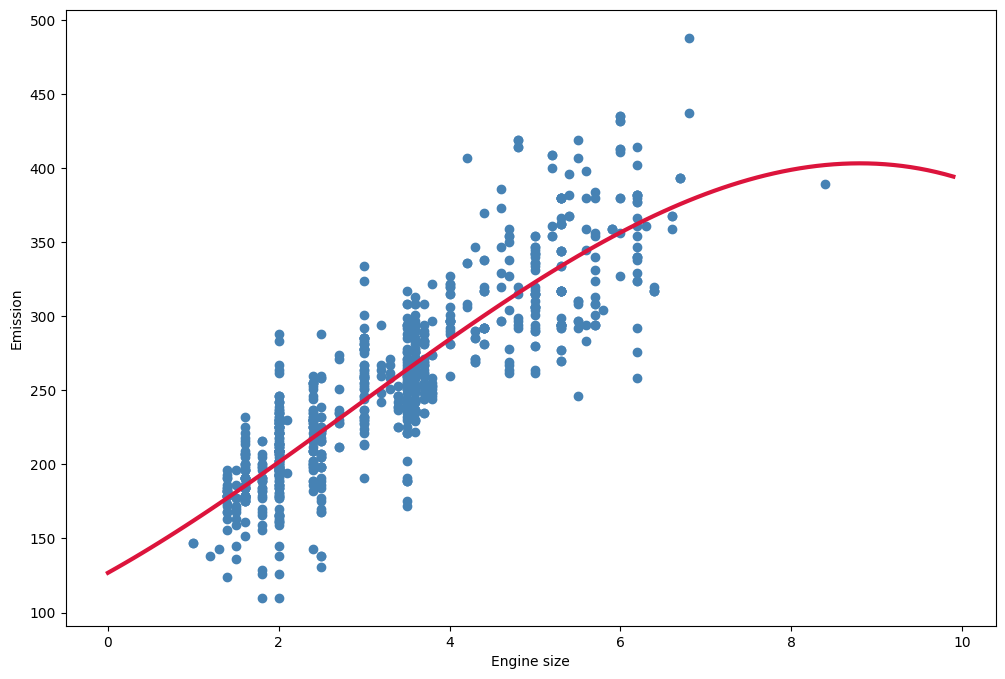

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='steelblue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX+ clf3.coef_[0][2]*np.power(XX, 2)+ clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, 'crimson', linewidth=3)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [16]:
from sklearn.metrics import r2_score

test_x_poly3 = poly_features.transform(test_x)
test_y_3 = clf3.predict(test_x_poly3)

print(f"Mean absolute error (MAE): {np.mean(np.absolute(test_y_3 - test_y)):0.2f}")
print(f"Residual sum of squares (MSE): {np.mean((test_y_3 - test_y) ** 2):0.2f}")
print(f"R2-score: {r2_score(test_y_3 , test_y):0.2f}")
print(f"RMSE: {np.sqrt(np.mean((test_y_3 - test_y) ** 2)):0.2f}")

Mean absolute error (MAE): 22.94
Residual sum of squares (MSE): 897.77
R2-score: 0.72
RMSE: 29.96
